Refer folder structure containing image data for two classes, **Cars** and **Bikes**, and must first verify and refer to this structure before implementation. All RGB images from both folders should be loaded, resized to a fixed size, normalized, and converted into one-dimensional feature vectors. Class labels must be assigned, after which the combined dataset should be shuffled and split into training and testing sets in an 80:20 ratio. A logistic regression model is to be implemented from scratch by initializing weights and bias, defining the sigmoid function, performing forward and backward propagation, and updating parameters using gradient descent. The model should be trained for a fixed number of iterations while recording the cost values. Finally, predictions must be generated for both training and testing datasets to compute accuracy, and a cost versus iterations graph should be plotted along with reporting the final training and testing accuracy.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [4]:
DATASET_PATH = "transport"
CATEGORIES = ["bike", "cars"]
IMG_SIZE = 64


In [5]:
def load_dataset(base_path, categories, img_size):
    X = []
    Y = []

    for label, category in enumerate(categories):
        folder_path = os.path.join(base_path, category)
        
        # Verify folder exists
        assert os.path.exists(folder_path), f"{folder_path} not found"
        print(f"Loading images from {folder_path}")

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((img_size, img_size))
                img = np.array(img) / 255.0     # Normalize
                img = img.flatten()             # Convert to 1D vector

                X.append(img)
                Y.append(label)
            except:
                print(f"Skipping corrupted image: {img_path}")

    return np.array(X), np.array(Y)


In [6]:
X, Y = load_dataset(DATASET_PATH, CATEGORIES, IMG_SIZE)

print("Total samples:", X.shape[0])
print("Feature vector size:", X.shape[1])


Loading images from transport/bike
Loading images from transport/cars
Total samples: 785
Feature vector size: 12288


In [7]:
# Shuffle dataset
indices = np.random.permutation(X.shape[0])
X = X[indices]
Y = Y[indices]

# Split
split = int(0.8 * X.shape[0])

X_train = X[:split].T
Y_train = Y[:split].reshape(1, -1)

X_test = X[split:].T
Y_test = Y[split:].reshape(1, -1)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (12288, 628)
Test set shape: (12288, 157)


In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [9]:
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b


In [10]:
def propagate(w, b, X, Y):
    m = X.shape[1]

    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

    # Backward propagation
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    grads = {"dw": dw, "db": db}
    return grads, cost


In [11]:
def optimize(w, b, X, Y, iterations, learning_rate):
    costs = []

    for i in range(iterations):
        grads, cost = propagate(w, b, X, Y)

        w -= learning_rate * grads["dw"]
        b -= learning_rate * grads["db"]

        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost}")

    return w, b, costs


In [12]:
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    return (A > 0.5).astype(int)


In [13]:
w, b = initialize_parameters(X_train.shape[0])

w, b, costs = optimize(
    w, b,
    X_train, Y_train,
    iterations=2000,
    learning_rate=0.005
)


Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.87148258812115
Cost after iteration 200: 0.7858582942992401
Cost after iteration 300: 0.7168311024488421
Cost after iteration 400: 0.6615547547516736
Cost after iteration 500: 0.616711866196539
Cost after iteration 600: 0.579466527160851
Cost after iteration 700: 0.5477470584062034
Cost after iteration 800: 0.5201447323909386
Cost after iteration 900: 0.4957004388467066
Cost after iteration 1000: 0.47373999619663826
Cost after iteration 1100: 0.45377141082993405
Cost after iteration 1200: 0.4354241785258668
Cost after iteration 1300: 0.4184131189940828
Cost after iteration 1400: 0.4025160811558743
Cost after iteration 1500: 0.3875600177394527
Cost after iteration 1600: 0.37341346312083595
Cost after iteration 1700: 0.359987090104204
Cost after iteration 1800: 0.3472519653333164
Cost after iteration 1900: 0.33530973602253006


In [19]:
classes = np.array(["bike", "car"])
my_image = "carsgraz_001.bmp"   # any image name
fname = "transport/cars/" + my_image   # or transport/bike/

image = np.array(Image.open(fname).resize((IMG_SIZE, IMG_SIZE)))
image = image / 255.0
image = image.reshape((1, IMG_SIZE*IMG_SIZE*3)).T


In [21]:
my_predicted_image = predict(w, b, image)
print("Predicted class for the image:", classes[my_predicted_image[0][0]])

Predicted class for the image: car


In [22]:
print(
    "y = " + str(np.squeeze(my_predicted_image)) +
    ", your algorithm predicts a \"" +
    classes[int(np.squeeze(my_predicted_image))] +
    "\" image."
)


y = 1, your algorithm predicts a "car" image.


In [14]:
train_pred = predict(w, b, X_train)
test_pred = predict(w, b, X_test)

train_accuracy = 100 - np.mean(np.abs(train_pred - Y_train)) * 100
test_accuracy = 100 - np.mean(np.abs(test_pred - Y_test)) * 100

print(f"\nTraining Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")



Training Accuracy: 88.85%
Testing Accuracy: 62.42%


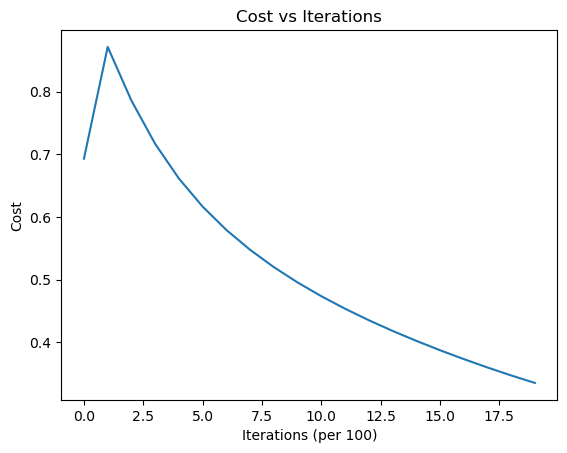

In [15]:
plt.plot(costs)
plt.xlabel("Iterations (per 100)")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()
